# Regression on Graduate Admission Prediction dataset

In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.regularizers import l2


import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

## Set parameters

In [2]:
lr = 0.001
no_epochs = 500
batch_size = 8
beta = 0.001

NO_INPUTS = 7
no_neurons = 10

seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

## Read data

In [3]:
# read in data from csv file
df = pd.read_csv('admission_predict.csv')
df=df.values

## Split train set and test set

In [4]:
# data
# generate training data from csv file

# inputs are the second colomn to the last second column
X = df[:,1:8]
# normalizing every input
mean_arr = np.mean(X, axis = 0)
std_arr = np.std(X, axis = 0)
for i in range(400):
    for j in range(7):
        X[i,j] = (X[i,j] - mean_arr[j])/std_arr[j]
        
# target is the last column
Y = df[:,8]
Y = Y.reshape(400,1)
# split training and testing sets (70/30)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42) 

## Build model

In [5]:
# min and max value for weight initialization
w_min_relu = -np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons)
w_max_relu = np.sqrt(6)/np.sqrt(NO_INPUTS+no_neurons)
w_min_linear = -np.sqrt(6)/np.sqrt(no_neurons+1)
w_max_linear = np.sqrt(6)/np.sqrt(no_neurons+1)

model = Sequential([Dense(no_neurons, activation='relu', 
                          kernel_initializer=RandomUniform(w_min_relu, w_max_relu), 
                          kernel_regularizer=l2(beta)),
                    Dense(1, activation = 'linear',
                          kernel_initializer=RandomUniform(w_min_linear, w_max_linear),
                          kernel_regularizer=l2(beta))])
    
model.compile(optimizer='sgd', 
              loss='mean_squared_error',
              metrics=['mse'])

## Train model

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=0,
                    use_multiprocessing=True,
                    validation_data=(x_test, y_test))

## Plot loss curve

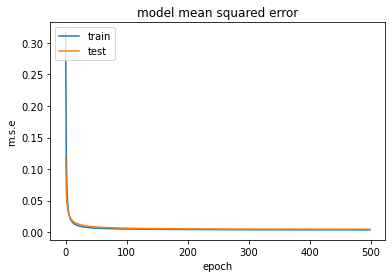

In [7]:
# summarize history for loss
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean squared error')
plt.ylabel('m.s.e')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Plot target and prediction

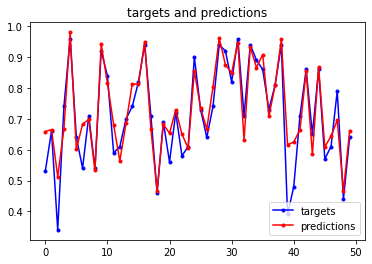

In [11]:
x_test_sub = tf.cast(x_test[15:65, :], tf.float32) 
y_test_sub = tf.cast(y_test[15:65, :], tf.float32)
pred = model(x_test_sub)
plt.plot(y_test_sub, color='blue', marker='.')
plt.plot(pred, color='red', marker='.')
plt.legend(['targets', 'predictions'], loc='lower right')
plt.title('targets and predictions')
plt.show()